In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import string
import nltk

In [8]:
yelp = pd.read_csv('data.csv',encoding = 'latin1')

In [9]:
yelp.head()

,Unnamed: 0,business_id,stars,text,name,state,categories
0,99486,YDeN4OHayfKocEo7Tz4jMg,2,Solid food but the service is lacking.\r\n\r\n...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian
1,99487,YDeN4OHayfKocEo7Tz4jMg,4,My friend and I ate here before seeing a movie...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian
2,99488,YDeN4OHayfKocEo7Tz4jMg,4,Okay I didn't expect much from this place. I j...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian
3,99489,YDeN4OHayfKocEo7Tz4jMg,4,La Tagliatella just opened up in the Epicentre...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian
4,99490,YDeN4OHayfKocEo7Tz4jMg,3,I'm torn on whether this is a 2 or 3 star plac...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian


In [18]:
def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9()!\'\`%$]", " ", string) # replace single characters not present in the lists by a space.
    string = re.sub(r"\'s", " \'s", string) # separate it with the word before（add space）
    string = re.sub(r"\'ve", " have", string) 
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\%", " % ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'t"," not",string)
    string = re.sub(r"\'m", " am", string)
    
    
    # removing non ascii
    string = re.sub(r'[^\x00-\x7F]+', "", string) 
    
    return string.strip().lower()

In [15]:
yelp.head()

,Unnamed: 0,business_id,stars,text,name,state,categories,textclean
0,99486,YDeN4OHayfKocEo7Tz4jMg,2,Solid food but the service is lacking.\r\n\r\n...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,solid food but the service is lacking we were ...
1,99487,YDeN4OHayfKocEo7Tz4jMg,4,My friend and I ate here before seeing a movie...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,my friend and i ate here before seeing a movie...
2,99488,YDeN4OHayfKocEo7Tz4jMg,4,Okay I didn't expect much from this place. I j...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,okay i didn't expect much from this place i ju...
3,99489,YDeN4OHayfKocEo7Tz4jMg,4,La Tagliatella just opened up in the Epicentre...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,la tagliatella just opened up in the epicentre...
4,99490,YDeN4OHayfKocEo7Tz4jMg,3,I'm torn on whether this is a 2 or 3 star plac...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,i'm torn on whether this is a 2 or 3 star plac...


In [19]:
text_data=[]
for information in yelp['text']:
    text_data.append(clean_str(information))

In [20]:
yelp["textclean"]=text_data
yelp.head()

,Unnamed: 0,business_id,stars,text,name,state,categories,textclean
0,99486,YDeN4OHayfKocEo7Tz4jMg,2,Solid food but the service is lacking.\r\n\r\n...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,solid food but the service is lacking we were ...
1,99487,YDeN4OHayfKocEo7Tz4jMg,4,My friend and I ate here before seeing a movie...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,my friend and i ate here before seeing a movie...
2,99488,YDeN4OHayfKocEo7Tz4jMg,4,Okay I didn't expect much from this place. I j...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,okay i didn not expect much from this place i ...
3,99489,YDeN4OHayfKocEo7Tz4jMg,4,La Tagliatella just opened up in the Epicentre...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,la tagliatella just opened up in the epicentre...
4,99490,YDeN4OHayfKocEo7Tz4jMg,3,I'm torn on whether this is a 2 or 3 star plac...,"""La Tagliatella EpiCentre""",NC,Pizza;Restaurants;Italian,i am torn on whether this is a 2 or 3 star pla...


In [23]:
df=yelp.sample(50000)
df=df[["stars","textclean"]]
df.head()
len(df)


50000

In [24]:
df.head()

,stars,textclean
7954,5,we had breakfast and lunch thanks to an oversi...
111141,5,do you want a sweet date spot do you like your...
17129,4,coming from atlanta ( aka korean food capital ...
198285,4,very friendly and personable folks they have a...
11764,3,after seeing pictures of the red velvet waffle...


In [25]:
import nltk
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
df.textclean=df.textclean.apply(lambda textclean: " ".join([stemmer.stem(word) for word in textclean.split(" ")]))

In [26]:
df.head()

,stars,textclean
7954,5,we had breakfast and lunch thank to an overs b...
111141,5,do you want a sweet date spot do you like your...
17129,4,come from atlanta ( aka korean food capit of t...
198285,4,veri friendli and person folk they have a nice...
11764,3,after see pictur of the red velvet waffl i wan...


In [27]:
df['stars'] = df['stars'].apply(lambda x : 'pos' if x > 3 else 'neg')
df.head()


,stars,textclean
7954,pos,we had breakfast and lunch thank to an overs b...
111141,pos,do you want a sweet date spot do you like your...
17129,pos,come from atlanta ( aka korean food capit of t...
198285,pos,veri friendli and person folk they have a nice...
11764,neg,after see pictur of the red velvet waffl i wan...


In [28]:
df.groupby('stars')['textclean'].count()

stars
neg    17868
pos    32132
Name: textclean, dtype: int64

In [56]:
reviews=df
print ('Percentage of negative reviews %.2f %%' % ((reviews.groupby('stars')['textclean'].count()['neg'])*100.0/len(reviews)))
print ('Percentage of positive reviews %.2f %%' % ((reviews.groupby('stars')['textclean'].count()['pos'])*100.0/len(reviews)))

Percentage of negative reviews 35.74 %
Percentage of positive reviews 64.26 %


In [57]:
reviews.head()

,stars,textclean,text_clean_noisefree
7954,pos,we had breakfast and lunch thank to an overs b...,we breakfast and lunch thank to an overs break...
111141,pos,do you want a sweet date spot do you like your...,you want sweet date spot you like your flavor ...
17129,pos,come from atlanta ( aka korean food capit of t...,come from atlanta ( aka korean food capit of s...
198285,pos,veri friendli and person folk they have a nice...,veri friendli and person folk they nice select...
11764,neg,after see pictur of the red velvet waffl i wan...,after see pictur of red velvet waffl i want to...


In [38]:
#Removing irregularitites
noise_list = ["is","a","this","...","the","are","has","have","had","did","do"]
def remove_stopwords(textclean):
    
    words = textclean.split()
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text


In [39]:
reviews.head()

,stars,textclean
7954,pos,we had breakfast and lunch thank to an overs b...
111141,pos,do you want a sweet date spot do you like your...
17129,pos,come from atlanta ( aka korean food capit of t...
198285,pos,veri friendli and person folk they have a nice...
11764,neg,after see pictur of the red velvet waffl i wan...


In [43]:
stop_words_remove_data=[]
for information in reviews['textclean']:
    stop_words_remove_data.append((information))

In [44]:
reviews['text_clean_noisefree']=stop_words_remove_data

In [45]:
reviews.head()

,stars,textclean,text_clean_noisefree
7954,pos,we had breakfast and lunch thank to an overs b...,we breakfast and lunch thank to an overs break...
111141,pos,do you want a sweet date spot do you like your...,you want sweet date spot you like your flavor ...
17129,pos,come from atlanta ( aka korean food capit of t...,come from atlanta ( aka korean food capit of s...
198285,pos,veri friendli and person folk they have a nice...,veri friendli and person folk they nice select...
11764,neg,after see pictur of the red velvet waffl i wan...,after see pictur of red velvet waffl i want to...


In [46]:
reviews=reviews[["stars","text_clean_noisefree"]]

In [47]:
reviews.head()

,stars,text_clean_noisefree
7954,pos,we breakfast and lunch thank to an overs break...
111141,pos,you want sweet date spot you like your flavor ...
17129,pos,come from atlanta ( aka korean food capit of s...
198285,pos,veri friendli and person folk they nice select...
11764,neg,after see pictur of red velvet waffl i want to...


In [58]:
X=reviews.text_clean_noisefree
y=reviews.stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
# Instantiate the count vectorizer with english for stop words.
count_vect = CountVectorizer(stop_words='english')
# Fit the text and transform it into a vector. This will return a sparse matrix.
count_vectorized = count_vect.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfVectorizer


In [62]:
tfidf_vect=TfidfTransformer()
tfidf_vectorized=tfidf_vect.fit_transform(count_vectorized)


In [63]:
cte_features_all = count_vect.transform(X_test)
te_features_all = tfidf_vect.transform(cte_features_all)

In [64]:
#Pca doesn't apply to sparse matrices so we use a different version of PCA called Truncated SVD

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
tr_features_truncated = svd.fit_transform(tfidf_vectorized)
te_features_truncated = svd.transform(te_features_all)
svd = TruncatedSVD(n_components=200)
ctr_features_truncated = svd.fit_transform(count_vectorized)
cte_features_truncated = svd.transform(cte_features_all)

In [65]:
X_train.head()

118644    veri nice littl market staff help and veri pol...
169456    food wa not bad but wa surpris that bbq sauc w...
43646     excel food fantast servic wish i would caught ...
69081     good wing flavor and decent draft special but ...
6118      i am not from buffalo nor i ever been near tha...
Name: text_clean_noisefree, dtype: object

In [66]:
#NOW WE HAVE TO RUN MODELS
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

models = {'BernoulliNB':BernoulliNB(binarize=0.5)
          ,'Logistic' : linear_model.LogisticRegression(C=1e5),'Decision Tree' : DecisionTreeClassifier(random_state=20160121, criterion='entropy'),
                                                                                                        'Perceptron': linear_model.Perceptron(n_iter=1000)}
                                                                                                        
results_svd = pd.DataFrame()

In [67]:
foldnum = 0
tfprediction = {}
cprediction = {}

In [68]:
from sklearn import metrics

for name,model in models.items():
        model.fit(tr_features_truncated, y_train)
        tfprediction[name] = model.predict(te_features_truncated)
        tfaccuracy = metrics.accuracy_score(tfprediction[name],y_test)
        results_svd.loc[foldnum,'Model']=name
        results_svd.loc[foldnum,'TF-IDF Accuracy']=tfaccuracy
        foldnum=foldnum+1
print (results_svd)

C:\Users\prach\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


           Model  TF-IDF Accuracy
0    BernoulliNB           0.6473
1       Logistic           0.8735
2  Decision Tree           0.7359
3     Perceptron           0.6957


In [69]:
for name,model in models.items():
    print ("Classification report for ",name)
    print(metrics.classification_report(y_test, tfprediction[name]))
    print("\n")
    
results_svd.plot(kind='bar',color=['r','g','b','y'],title='Model Performance',figsize=(10,6),x='Model',legend=False)

Classification report for  BernoulliNB
             precision    recall  f1-score   support

        neg       0.00      0.00      0.00      3527
        pos       0.65      1.00      0.79      6473

avg / total       0.42      0.65      0.51     10000



Classification report for  Logistic
             precision    recall  f1-score   support

        neg       0.84      0.80      0.82      3527
        pos       0.89      0.92      0.90      6473

avg / total       0.87      0.87      0.87     10000



Classification report for  

C:\Users\prach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree
             precision    recall  f1-score   support

        neg       0.62      0.64      0.63      3527
        pos       0.80      0.79      0.79      6473

avg / total       0.74      0.74      0.74     10000



Classification report for  Perceptron
             precision    recall  f1-score   support

        neg       0.54      0.97      0.69      3527
        pos       0.97      0.55      0.70      6473

avg / total       0.82      0.70      0.70     10000





In [70]:
#Now using the bigram approach
count_vect=CountVectorizer(ngram_range=(1,2),stop_words='english')
count_vectorized=count_vect.fit_transform(X_train)
tfidf_vect=TfidfTransformer()
tfidf_vectorized=tfidf_vect.fit_transform(count_vectorized)

In [71]:
cte_features_all=count_vect.transform(X_test)
te_features_all = tfidf_vect.transform(cte_features_all)

In [72]:
results_all_bi = pd.DataFrame()
tfprediction = {}
cprediction = {}
foldnum = 0

In [73]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model

In [74]:
models = {'BernoulliNB':BernoulliNB(binarize=0.5)
          ,'Logistic' : linear_model.LogisticRegression(C=1e5),'Perceptron': linear_model.Perceptron(n_iter=1000)}

In [75]:
from sklearn import metrics
for name,model in models.items():
        model.fit(tfidf_vectorized, y_train)
        tfprediction[name] = model.predict(te_features_all)
        tfaccuracy = metrics.accuracy_score(tfprediction[name],y_test)
        results_all_bi.loc[foldnum,'TF-IDF Accuracy']=tfaccuracy
        results_all_bi.loc[foldnum,'Model']=name
        foldnum = foldnum+1
print (results_all_bi)

C:\Users\prach\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


   TF-IDF Accuracy        Model
0           0.6473  BernoulliNB
1           0.8940     Logistic
2           0.8864   Perceptron


In [76]:
for name,model in models.items():
    print ("Classification report for ",name)
    print(metrics.classification_report(y_test, tfprediction[name]))
    print("\n")

Classification report for  BernoulliNB
             precision    recall  f1-score   support

        neg       0.00      0.00      0.00      3527
        pos       0.65      1.00      0.79      6473

avg / total       0.42      0.65      0.51     10000



Classification report for  Logistic
             precision    recall  f1-score   support

        neg       0.87      0.83      0.85      3527
        pos       0.91      0.93      0.92      6473

avg / total       0.89      0.89      0.89     10000



Classification report for  Perceptron
             precision    recall  f1-score   support

        neg       0.85      0.82      0.84      3527
        pos       0.90      0.92      0.91      6473

avg / total       0.89      0.89      0.89     10000





C:\Users\prach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
results_all_bi.plot(kind='bar',color=['r','g','b'],title='Model Performance',figsize=(10,6),x='Model',legend=False)

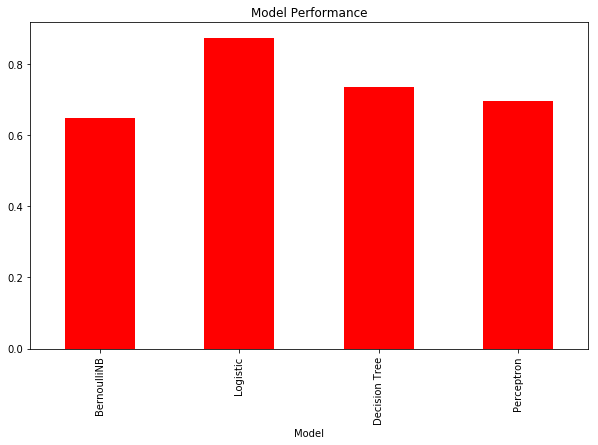

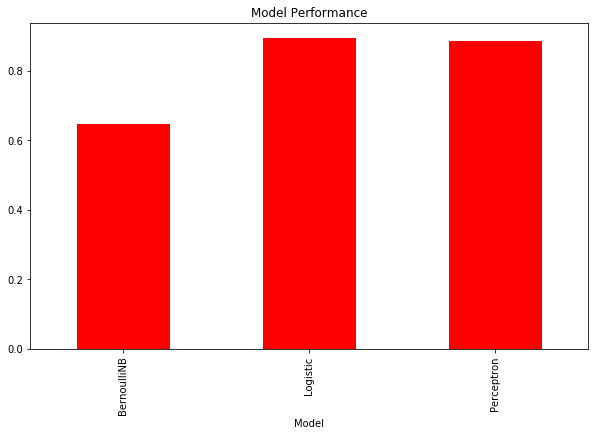

In [78]:
plt.show()

In [79]:
# Considering TRIGRAMS

count_vect=CountVectorizer(ngram_range=(1,3),stop_words='english')
count_vectorized=count_vect.fit_transform(X_train)
tfidf_vect=TfidfTransformer()
tfidf_vectorized=tfidf_vect.fit_transform(count_vectorized)
cte_features_all=count_vect.transform(X_test)
te_features_all=tfidf_vect.transform(cte_features_all)

In [80]:
results_all_tri = pd.DataFrame()
tfprediction = {}
cprediction = {}
foldnum = 0

In [82]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model

models = {'BernoulliNB':BernoulliNB(binarize=0.5)
          ,'Logistic' : linear_model.LogisticRegression(C=1e5),
                                                                                                        'Perceptron': linear_model.Perceptron(n_iter=1000)}

In [83]:
from sklearn import metrics
for name,model in models.items():
        model.fit(tfidf_vectorized, y_train)
        tfprediction[name] = model.predict(te_features_all)
        tfaccuracy = metrics.accuracy_score(tfprediction[name],y_test)
        results_all_tri.loc[foldnum,'TF-IDF Accuracy']=tfaccuracy
        results_all_tri.loc[foldnum,'Model']=name
        foldnum = foldnum+1
print (results_all_tri)

C:\Users\prach\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


   TF-IDF Accuracy        Model
0           0.6473  BernoulliNB
1           0.8955     Logistic
2           0.8868   Perceptron


In [84]:
for name,model in models.items():
    print ("Classification report for ",name)
    print(metrics.classification_report(y_test, tfprediction[name]))
    print("\n")

Classification report for  BernoulliNB
             precision    recall  f1-score   support

        neg       0.00      0.00      0.00      3527
        pos       0.65      1.00      0.79      6473

avg / total       0.42      0.65      0.51     10000



Classification report for  Logistic
             precision    recall  f1-score   support

        neg       0.87      0.83      0.85      3527
        pos       0.91      0.93      0.92      6473

avg / total       0.89      0.90      0.89     10000



Classification report for  Perceptron
             precision    recall  f1-score   support

        neg       0.86      0.81      0.84      3527
        pos       0.90      0.93      0.91      6473

avg / total       0.89      0.89      0.89     10000





C:\Users\prach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
results_all_tri.plot(kind='bar',color=['r','g','b'],title='Model Performance',figsize=(10,6),x='Model',legend=False)

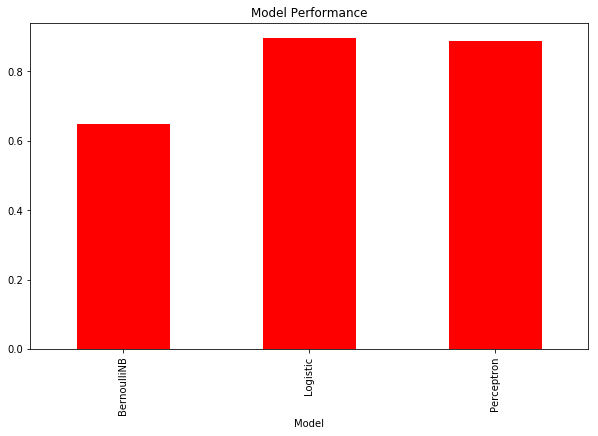

In [90]:
plt.show()

In [92]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(labels)))
    plt.xticks(tick_marks, ['neg','pos'], rotation=45)
    plt.yticks(tick_marks, ['neg','pos'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test,tfprediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)  

KeyError: 'Logistic'